videoFrameName:  ./test_images/video_frames/frame0001.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
videoFrameName:  ./test_images/video_frames/frame0001.jpg , binaryImage.shape: (720, 1180) , type: uint8
initializeSlidingWindows - binaryImage.shape: (720, 1180) , type: uint8
total pixels: 849600 , whiteX: 43266 , whiteY: 43266
locateLaneMarkerIndex - binaryImage.shape: (720, 1180) , type: uint8
locateLaneMarkerIndex - startingInRow:  72 , startingInColumn: 118 , endingInRow: 576
locateLaneMarkerIndex - croppedBinaryImage.shape: (504, 1062) , type: uint8
locateLaneMarkerIndex - histogram.shape:  (1062,) , alignedHistogram.shape: (1180,) , type: uint64
locateLaneMarkerIndex - leftx_base: 230 , rightx_base: 924
leftx_base: 230 , rightx_base: 924
total pixels: 849600 , whiteX: 43266 , whiteY: 43266
nwindows:  9 , window_height: 80
binaryImage.shape: (720, 1180) , type: uint8
visualizationImage.shape: (720, 1180, 3) , type: uint8
window:  0 , window.shape: ( 130 , 330 ),( 824 , 1024

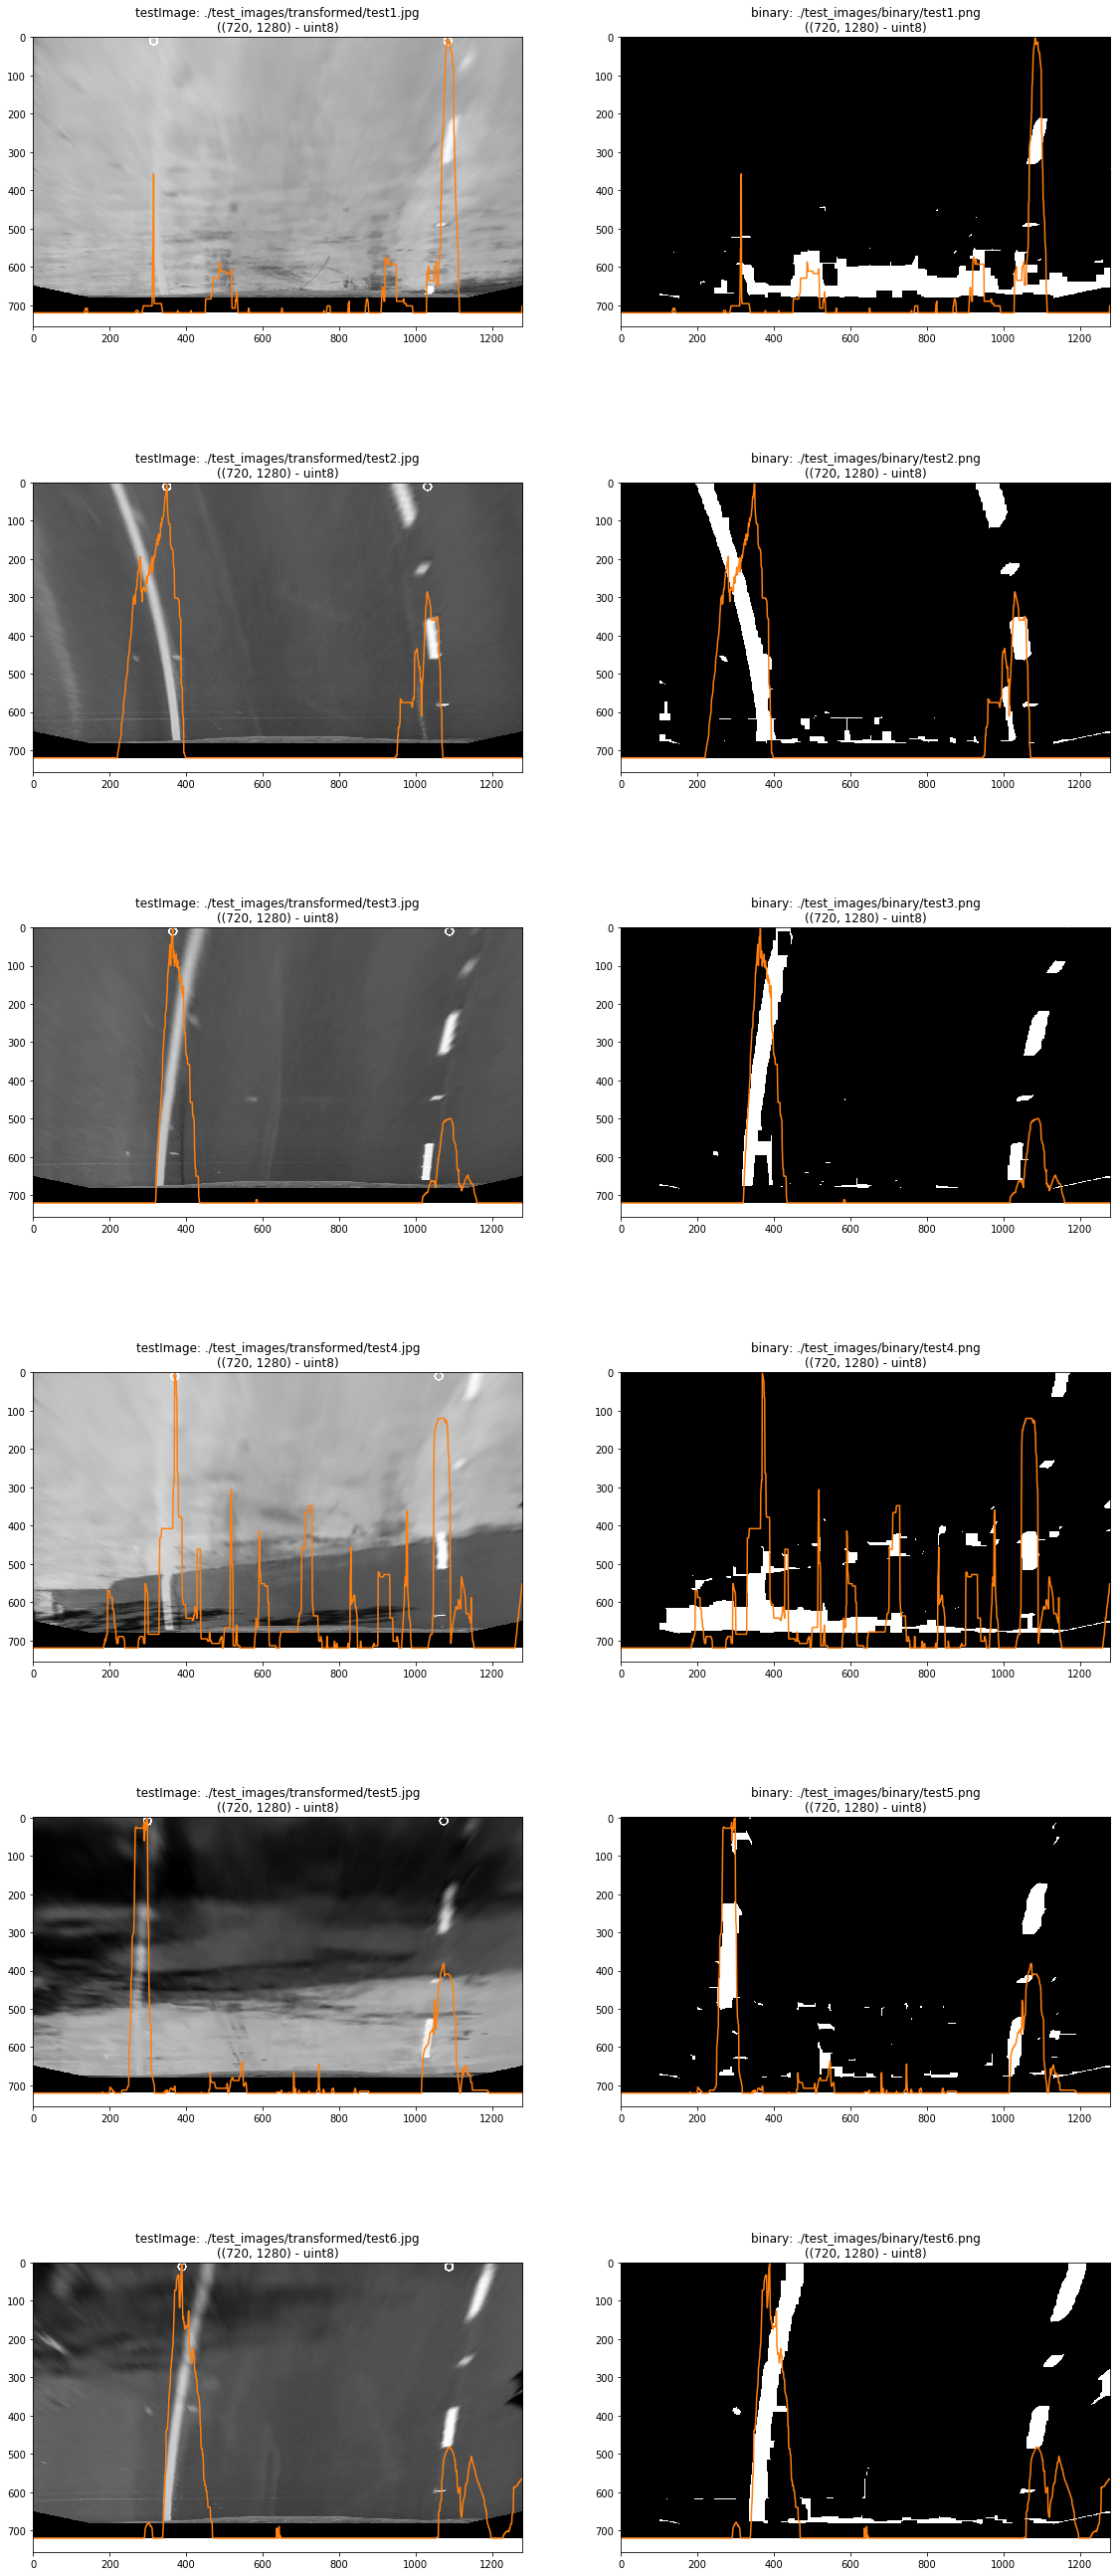

In [59]:
import glob
import numpy as np
import ProcessImage

def invertHistogram(histogram, maxValue):
    maxValueInHistogram=np.max(histogram)
    scale=float(maxValue)/float(maxValueInHistogram)
    invertedHistogram=np.zeros(histogram.shape[0], dtype=histogram.dtype)
    invertedHistogram=maxValue-histogram*scale
    return invertedHistogram

binaryImageNames=glob.glob("./test_images/binary/test*")
binaryImageNames.sort()
#binaryImageNames= [
#    './test_images/binary/test1.png',
#    './test_images/binary/test2.png',
#    './test_images/binary/test3.png',
#    './test_images/binary/test4.png',
#    './test_images/binary/test5.png',
#    './test_images/binary/test6.png'
#]
print("binaryImageNames:", binaryImageNames)
testImageNames=glob.glob("./test_images/transformed/test*")
testImageNames.sort()
#testImageNames= [
#    './test_images/transformed/test1.jpg',
#   './test_images/transformed/test2.jpg',
#    './test_images/transformed/test3.jpg',
#    './test_images/transformed/test4.jpg',
#    './test_images/transformed/test5.jpg',
#    './test_images/transformed/test6.jpg'
#]
print("testImageNames:", testImageNames)

binaryImageColumnCount=3 # original, transformed
totalImageRows=len(binaryImageNames) # 1 row per image

#import matplotlib.image as mpimage
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
showBinaryImages = plt.figure(figsize = (binaryImageColumnCount*10,totalImageRows*8))

binaryImages={}
histograms={}

for binaryImageName, testImageName, binaryImageIndex in zip(binaryImageNames, testImageNames, range(0, binaryImageColumnCount*len(binaryImageNames), binaryImageColumnCount)):
    binaryImage=cv2.imread(binaryImageName, flags=0) # flags=0 is grayscale
    print("binaryImageName: ",binaryImageName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)
    binaryImages[binaryImageName]=binaryImage

    p=showBinaryImages.add_subplot(totalImageRows, binaryImageColumnCount, binaryImageIndex+2)
    p.set_title("binary: "+binaryImageName+"\n("+str(binaryImage.shape)+" - "+str(binaryImage.dtype)+")")
    p.imshow(binaryImage, cmap='gray')

    [leftx_base, rightx_base], histogram=ProcessImage.locateLaneMarkerIndex(binaryImage)
    histograms[binaryImageName]=histogram
    print("binaryImageName: ",binaryImageName, ", histogram.shape:", histogram.shape, ", histogram[0]:", histogram[0])
    print("leftx_base:", leftx_base, ", histogram[leftx_base]", histogram[leftx_base], ", rightx_base:", rightx_base, ", histogram[rightx_base]:",histogram[rightx_base])
    invertedHistogram=invertHistogram(histogram, binaryImage.shape[0])
    p.plot(invertedHistogram, color='C1')
    
    testImage=cv2.imread(testImageName, flags=0) # flags=0 is grayscale
    cv2.circle(testImage, (leftx_base,10), 10, (255,255,0), 3)
    cv2.circle(testImage, (rightx_base,10), 10, (255,255,0), 3)
    #croppedTestImage=testImage[startingInRow:,:]
    #print("locateLaneMarkerIndex - testImageName: ",testImageName, ", croppedTestImage.shape:", croppedTestImage.shape, ", type:", croppedTestImage.dtype)
    #croppedTestImages[testImageName]=croppedTestImage
    p=showBinaryImages.add_subplot(totalImageRows, binaryImageColumnCount, binaryImageIndex+1)
    p.set_title("testImage: "+testImageName+"\n("+str(testImage.shape)+" - "+str(testImage.dtype)+")")
    p.imshow(testImage, cmap='gray')
    p.plot(invertedHistogram, color='C1')
    

testImage.shape: (720, 1280, 3) , type: uint8
binaryImageName:  ./test_images/binary/test1.png , binaryImage.shape: (720, 1280) , type: uint8
binaryImage counts: (array([0, 1], dtype=uint8), array([857037,  64563])) , shape: (720, 1280)
total pixels: 921600 , whiteX: 64563 , whiteY: 64563
locateLaneMarkerIndex - startingInRow:  72 , startingInColumn: 128 , endingInRow: 576
locateLaneMarkerIndex - binaryImageName:  ./test_images/binary/test1.png , croppedBinaryImage.shape: (504, 1152) , type: uint8
locateLaneMarkerIndex - histogram.shape:  (1152,) , alignedHistogram.shape: (1280,) , type: uint64
locateLaneMarkerIndex - binaryImageName: ./test_images/binary/test1.png , leftx_base: 315 , rightx_base: 1083
binaryImageName: ./test_images/binary/test1.png , leftx_base: 315 , rightx_base: 1083
total pixels: 921600 , whiteX: 64563 , whiteY: 64563
nwindows:  9 , window_height: 80
binaryImageName:  ./test_images/binary/test1.png , binaryImage.shape: (720, 1280) , type: uint8
binaryImageName:  ./

total pixels: 921600 , whiteX: 54620 , whiteY: 54620
locateLaneMarkerIndex - startingInRow:  72 , startingInColumn: 128 , endingInRow: 576
locateLaneMarkerIndex - binaryImageName:  ./test_images/binary/test6.png , croppedBinaryImage.shape: (504, 1152) , type: uint8
locateLaneMarkerIndex - histogram.shape:  (1152,) , alignedHistogram.shape: (1280,) , type: uint64
locateLaneMarkerIndex - binaryImageName: ./test_images/binary/test6.png , leftx_base: 389 , rightx_base: 1086
binaryImageName: ./test_images/binary/test6.png , leftx_base: 389 , rightx_base: 1086
total pixels: 921600 , whiteX: 54620 , whiteY: 54620
nwindows:  9 , window_height: 80
binaryImageName:  ./test_images/binary/test6.png , binaryImage.shape: (720, 1280) , type: uint8
binaryImageName:  ./test_images/binary/test6.png , visualizationImage.shape: (720, 1280, 3) , type: uint8
window:  0 , window.shape: ( 289 , 489 ),( 986 , 1186 ) x ( 640 , 720 )
window:  1 , window.shape: ( 282 , 482 ),( 990 , 1190 ) x ( 560 , 640 )
window:

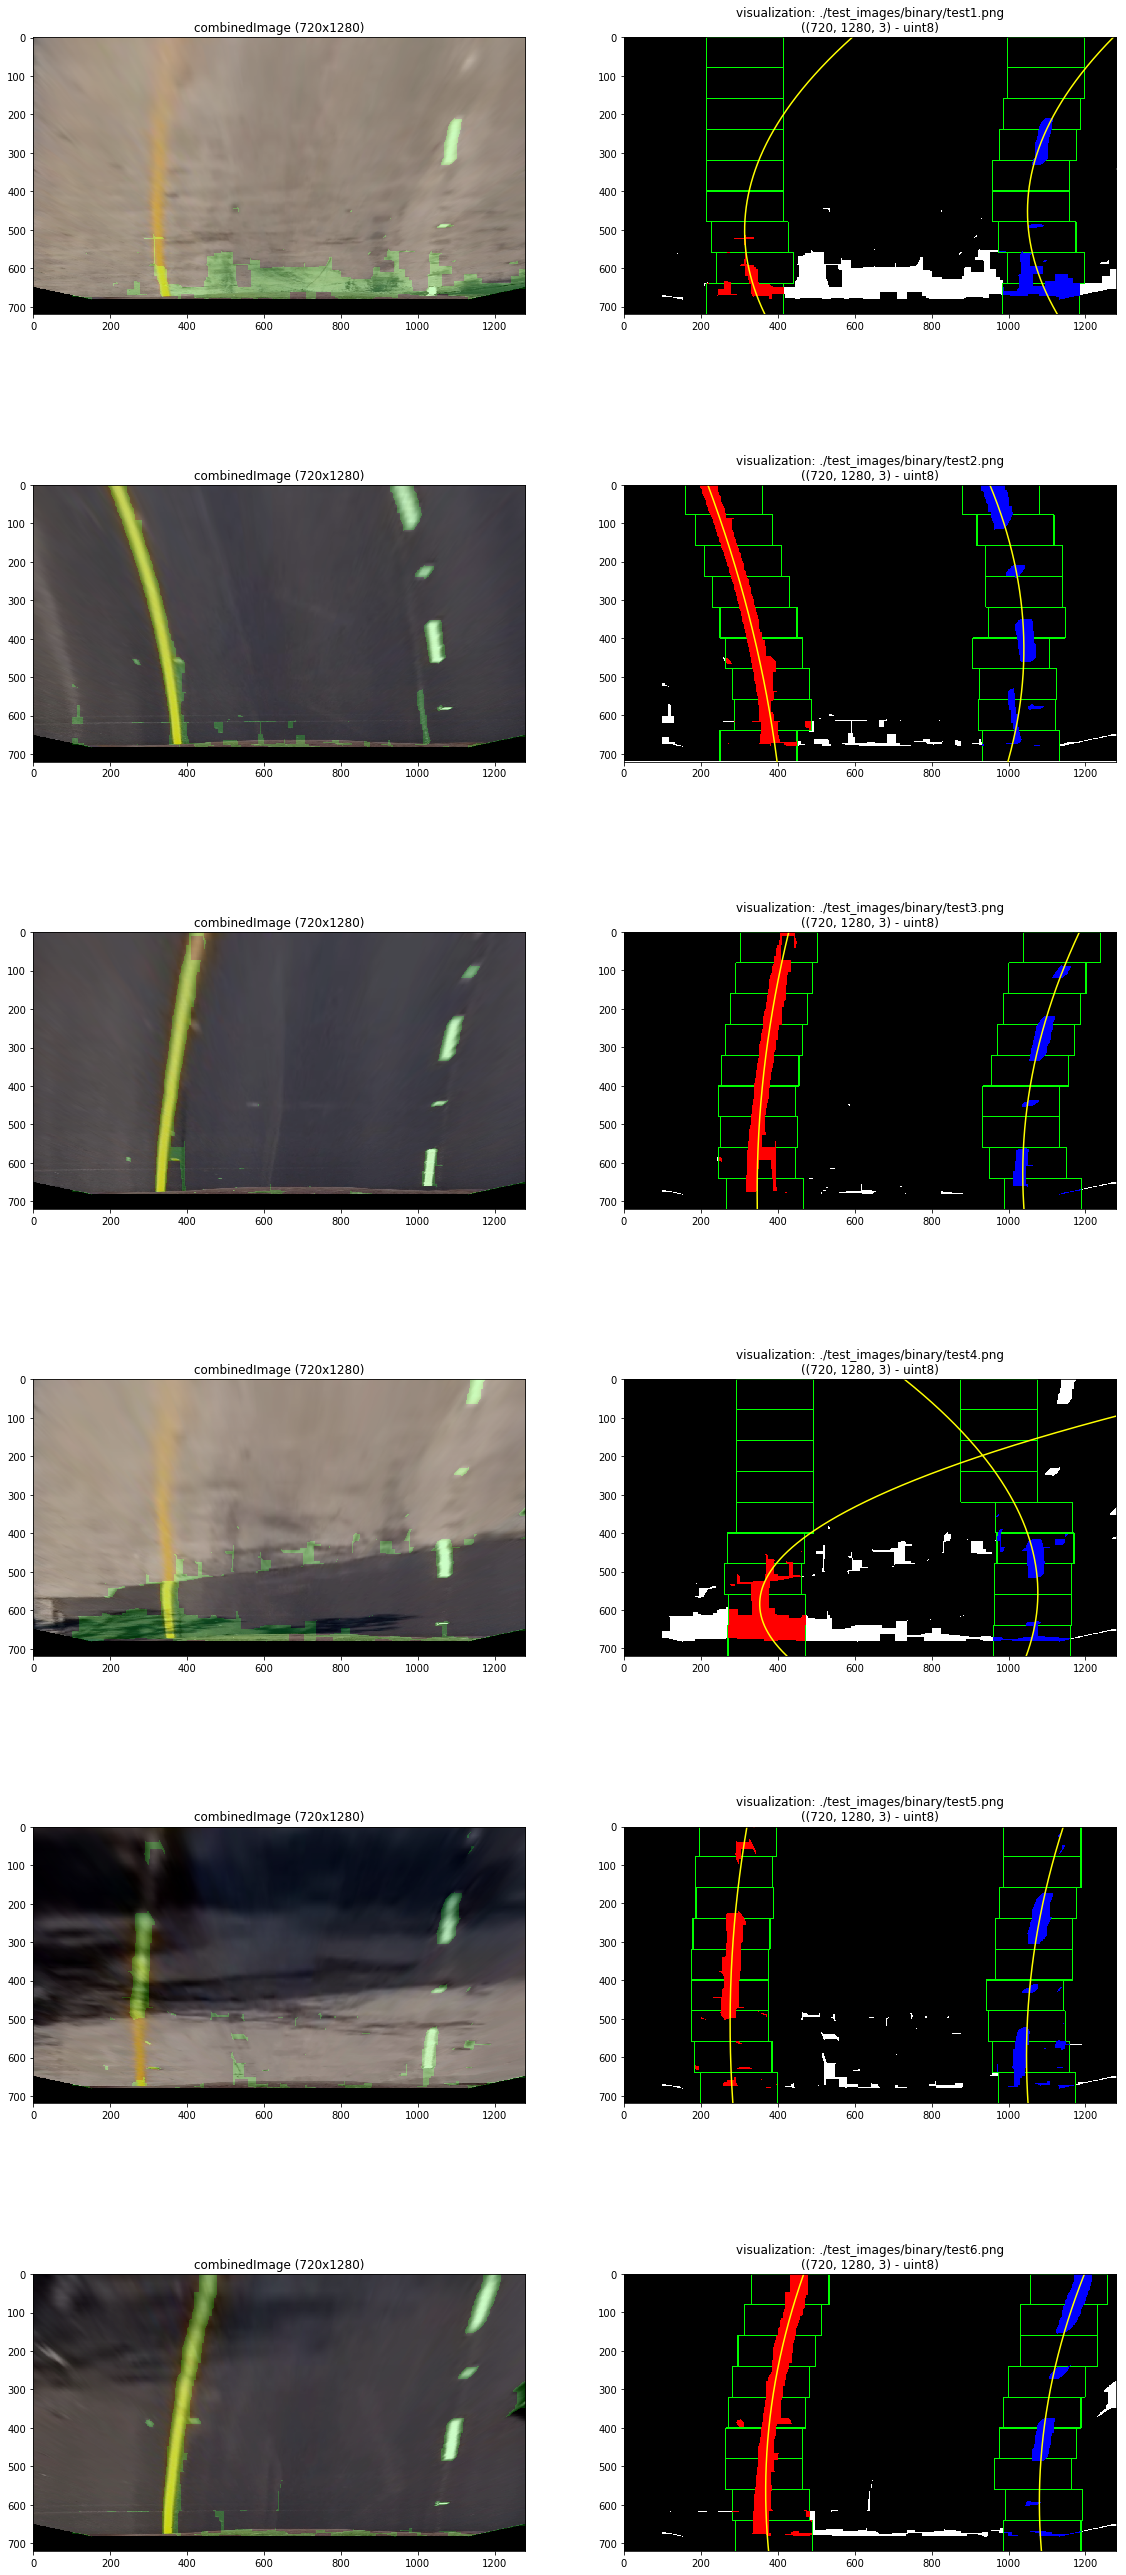

In [33]:
import matplotlib.image as mpimage

laneVisualizationColumnCount=3 # original, transformed
totalLaneVisualizationRows=len(binaryImageNames) # 1 row per image

def combineImages(img, initial_img, α=0.8, λ=0.):
    return cv2.addWeighted(initial_img, α, img, 1.-α, λ)

%matplotlib inline
showLaneVisualization= plt.figure(figsize = (laneVisualizationColumnCount*10,totalLaneVisualizationRows*8))

# cropping 100 pixels off the left and off the top
TRIMLEFT=0
TRIMTOP=100

for binaryImageName, testImageName, binaryImageIndex in zip(binaryImageNames, testImageNames, range(0, laneVisualizationColumnCount*len(binaryImageNames), laneVisualizationColumnCount)):

    testImage=cv2.imread(testImageName) # bgr image
    testImage=cv2.cvtColor(testImage, cv2.COLOR_BGR2RGB);
    print("testImage.shape:", testImage.shape, ", type:", testImage.dtype)
   
    
    binaryImage=binaryImages[binaryImageName] # 0/1
    print("binaryImageName: ",binaryImageName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)
    print("binaryImage counts:", np.unique(binaryImage, return_counts=True), ", shape:",binaryImage.shape)
    overlayImage=np.dstack((np.zeros_like(binaryImage), binaryImage, np.zeros_like(binaryImage)))*255 # rgb, with green only
    p=showLaneVisualization.add_subplot(totalLaneVisualizationRows, laneVisualizationColumnCount, binaryImageIndex+2)
    p.set_title("overlayImage ("+str(overlayImage.shape[0])+"x"+str(overlayImage.shape[1])+")")
    p.imshow(overlayImage)
    combinedImage=combineImages(overlayImage, testImage, α=.8)
    p=showLaneVisualization.add_subplot(totalLaneVisualizationRows, laneVisualizationColumnCount, binaryImageIndex+1)
    p.set_title("combinedImage ("+str(combinedImage.shape[0])+"x"+str(combinedImage.shape[1])+")")
    p.imshow(combinedImage)

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    histogram=histograms[binaryImageName]
    
    [left_fit, right_fit], visualizationImage = initializeSlidingWindows(binaryImage)
    ploty = np.linspace(0, binaryImage.shape[0]-1, binaryImage.shape[0] ) #  y/row values
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    p=showLaneVisualization.add_subplot(totalLaneVisualizationRows, laneVisualizationColumnCount, binaryImageIndex+2)
    p.set_title("visualization: "+binaryImageName+"\n("+str(visualizationImage.shape)+" - "+str(visualizationImage.dtype)+")")
    p.imshow(visualizationImage)
    
    p.plot(left_fitx, ploty, color='yellow')
    p.plot(right_fitx, ploty, color='yellow')
    p.set_xlim([0, visualizationImage.shape[1]])
    p.set_ylim([visualizationImage.shape[0], 0])


videoImages: ['./test_images/video_frames/frame0001.jpg', './test_images/video_frames/frame0002.jpg', './test_images/video_frames/frame0003.jpg', './test_images/video_frames/frame0004.jpg', './test_images/video_frames/frame0005.jpg', './test_images/video_frames/frame0006.jpg', './test_images/video_frames/frame0007.jpg', './test_images/video_frames/frame0008.jpg', './test_images/video_frames/frame0009.jpg', './test_images/video_frames/frame0010.jpg']
videoFrameName:  ./test_images/video_frames/frame0001.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
videoFrameName:  ./test_images/video_frames/frame0001.jpg , binaryImage.shape: (720, 1180) , type: uint8
initializeSlidingWindows - binaryImage.shape: (720, 1180) , type: uint8
total pixels: 849600 , whiteX: 43266 , whiteY: 43266
locateLaneMarkerIndex - binaryImage.shape: (720, 1180) , type: uint8
locateLaneMarkerIndex - startingInRow:  72 , startingInColumn: 118 , endingInRow: 576
locateLaneMarkerIndex - croppedBinaryImage.shape: (504

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:45: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


result.shape: (720, 1180, 3) , type: uint8
rgbImage.shape: (720, 1280, 3) , type: uint8
overlayImage.shape: (720, 1280, 3) , type: uint8
left_curverad: 2236.98495135 , right_curverad: 4015.39855736
733.303488966 m 1312.47817918 m
videoFrameName:  ./test_images/video_frames/frame0003.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
videoFrameName:  ./test_images/video_frames/frame0003.jpg , binaryImage.shape: (720, 1180) , type: uint8
nonzeroy.shape: (45323,) , type: int64
nonzerox.shape: (45323,) , type: int64
left_laneX.shape: (45323,) , type: float64
visualizationImage.shape: (720, 1180, 3) , type: uint8
result.shape: (720, 1180, 3) , type: uint8
rgbImage.shape: (720, 1280, 3) , type: uint8
overlayImage.shape: (720, 1280, 3) , type: uint8
left_curverad: 2637.27950818 , right_curverad: 4398.80675737
857.901546479 m 1433.43223714 m
videoFrameName:  ./test_images/video_frames/frame0004.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
videoFrameName:  ./test_images/video_frames/f

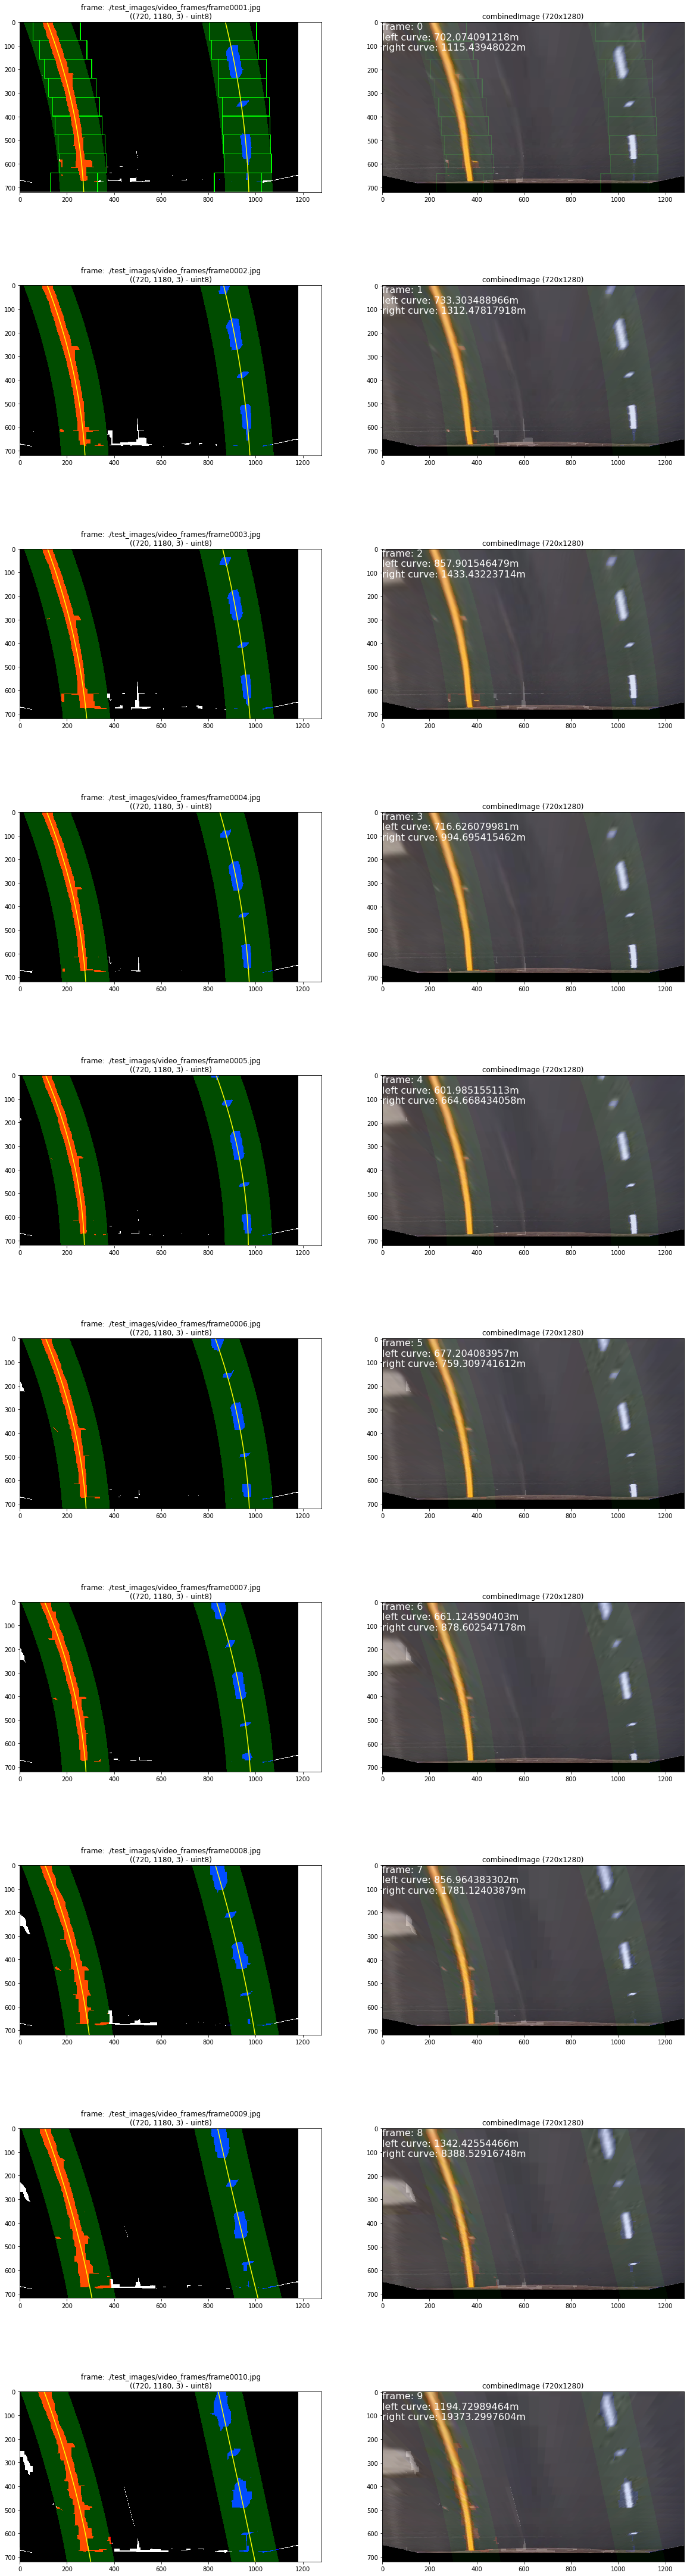

In [96]:
import glob
import numpy as np

import matplotlib.image as mpimage
import matplotlib.pyplot as plt

videoImages=glob.glob("./test_images/video_frames/frame*")
videoImages.sort()
#videoImages= [
#    './test_images/video_frames/frame0001.jpg',
#    './test_images/video_frames/frame0002.jpg',
#    './test_images/video_frames/frame0003.jpg',
#    './test_images/video_frames/frame0004.jpg',
#    './test_images/video_frames/frame0005.jpg',
#    './test_images/video_frames/frame0006.jpg',
#    './test_images/video_frames/frame0007.jpg',
#    './test_images/video_frames/frame0008.jpg',
#    './test_images/video_frames/frame0009.jpg',
#    './test_images/video_frames/frame0010.jpg'
#]
print("videoImages:", videoImages)


TRIMLEFT=100
TRIMTOP=0
TRIMBOTTOM=0

%matplotlib inline
VIDEOIMAGECOLUMNCOUNT=2
totalImageRows=len(videoImages)
showVideoFrames = plt.figure(figsize = (VIDEOIMAGECOLUMNCOUNT*10,totalImageRows*8))

# ploty is used as a flag for the 1st pass
ploty = None #  y/row values, one for ever integer y
left_fit = None # x = left_fit[0] y**2 + left_fit[1] y + left_fit[2]
right_fit = None
visualizationImage = None

for videoFrameName, videoFrameIndex in zip(videoImages, range(0, totalImageRows)):
    videoFrame=mpimage.imread(videoFrameName)
    print("videoFrameName: ",videoFrameName, ", videoFrame.shape:", videoFrame.shape, ", type:", videoFrame.dtype)
    binaryImage,incrementalImages=EnhanceLaneMarkers.enhanceLaneMarkers(videoFrame, trimLeft=TRIMLEFT, trimTop=TRIMTOP, trimBottom=TRIMBOTTOM)
    print("videoFrameName: ",videoFrameName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)
    
    if ploty==None: # could have checked for videoFrameIndex==0
        [left_fit, right_fit], visualizationImage=ProcessImage.processInitialImage(binaryImage)
    else: # process a new frame by assuming the old 2nd order polynomial still fits the new frame
        [left_fit, right_fit], visualizationImage=ProcessImage.processImage(binaryImage, left_fit, right_fit)
    
    # Generate new x and y values for plotting (the new) 2nd order poly
    ploty = np.linspace(0, binaryImage.shape[0]-1, binaryImage.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2] # 2nd order prediction of x from y
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # no idea how this works!
    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    #print("left_line_window1.shape:", left_line_window1.shape, ", type:", left_line_window1.dtype)
    #lm=left_fitx-margin
    #print("lm.shape:", lm.shape, ", type:", lm.dtype)
    #print("ploty.shape:", ploty.shape, ", ploty:", left_fitx.dtype)
    #left_line_window1 = np.hstack((lm, ploty))
    #print("left_line_window1.shape:", left_line_window1.shape, ", type:", left_line_window1.dtype)
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    #print("left_line_window2.shape:", left_line_window2.shape, ", type:", left_line_window2.dtype)
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    window_img = np.zeros_like(visualizationImage)
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    print("visualizationImage.shape:", visualizationImage.shape, ", type:", visualizationImage.dtype)
    result = cv2.addWeighted(visualizationImage, 1, window_img, 0.3, 0) # combine the 2 images
    print("result.shape:", result.shape, ", type:", result.dtype)
    p=showVideoFrames.add_subplot(totalImageRows, VIDEOIMAGECOLUMNCOUNT, videoFrameIndex*VIDEOIMAGECOLUMNCOUNT+1)
    p.set_title("frame: "+videoFrameName+"\n("+str(visualizationImage.shape)+" - "+str(visualizationImage.dtype)+")")
    #p.imshow(visualizationImage)
    #p.imshow(visualizationImage)
    p.imshow(result)
    p.plot(left_fitx, ploty, color='yellow')
    p.plot(right_fitx, ploty, color='yellow')
    p.set_xlim(0, 1280)
    p.set_ylim(720, 0)
    
    rgbImage=incrementalImages['undistortedAndTransformedImage'] # 720,1280
    print("rgbImage.shape:", rgbImage.shape, ", type:", rgbImage.dtype)
    overlayImage=np.zeros_like(rgbImage)
    overlayImage[TRIMTOP:TRIMTOP+result.shape[0], TRIMLEFT:TRIMLEFT+result.shape[1]]=result
    print("overlayImage.shape:", overlayImage.shape, ", type:", overlayImage.dtype)
    combinedImage=combineImages(overlayImage, rgbImage, α=.85)
    p=showVideoFrames.add_subplot(totalImageRows, VIDEOIMAGECOLUMNCOUNT, videoFrameIndex*VIDEOIMAGECOLUMNCOUNT+2)
    p.set_title("combinedImage ("+str(combinedImage.shape[0])+"x"+str(combinedImage.shape[1])+")")
    
    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    print("left_curverad:", left_curverad, ", right_curverad:", right_curverad)
    # Example values: 1926.74 1908.48
    
    # For each y position generate random x position within +/-50 pix
    # of the line base position in each case (x=200 for left, and x=900 for right)
    #leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
    #                          for y in ploty])
    #rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
    #                            for y in ploty])

    leftx = left_fitx[::-1]  # Reverse to match top-to-bottom in y
    rightx = right_fitx[::-1]  # Reverse to match top-to-bottom in y
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    # Example values: 632.1 m    626.2 m
    
    p.text(0., 1., ("frame: "+str(videoFrameIndex)+"\nleft curve: "+str(left_curverad)+"m\nright curve: "+str(right_curverad)+"m"),
           fontsize=16,
           horizontalalignment='left',
           verticalalignment='top',
           transform = p.transAxes,
           color='w')
    p.imshow(combinedImage)
    
